In [1]:
#import the necessary libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#calling this option to stop the rows and columns from being truncated in their display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [3]:
wd = r"C:\Users\Robby\Desktop\IAA\Personal Projects\WiDS"
train = pd.read_csv(wd+r'\TrainingWiDS2021.csv')
train_df = pd.read_csv(wd+r'\TrainingWiDS2021.csv')
test_df= pd.read_csv(wd+r'\UnlabeledWiDS2021.csv')

In [4]:
train.shape

(130157, 181)

In [5]:
train=train.iloc[:,1:]

In [6]:
train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [7]:
train.diabetes_mellitus.mean()

0.21628494817796967

21.6% of the patients in the training dataset have diabetes_mellitus

<AxesSubplot:>

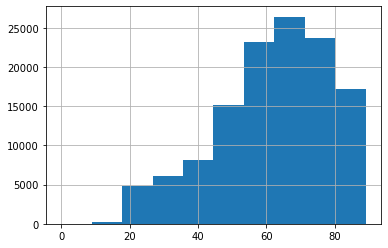

In [8]:
train.age.hist()

In [9]:
train.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.00000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.00000,105275.000000,30437.000000,127967.00000,127967.000000,129448.000000,127967.000000,115461.000000,129848.00000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.00000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.00000,129886.000000,128534.00000,128534.000000,125663.000000,125663.000000,25328.00000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000

-thangs to look at:
    -age where < 5 vs weight

In [10]:
var_names = train.columns.tolist()
#var_names

In [11]:
round(train.isna().sum()/len(train)*100,2)

encounter_id                   0.0
hospital_id                    0.0
                              ... 
solid_tumor_with_metastasis    0.0
diabetes_mellitus              0.0
Length: 180, dtype: float64

In [12]:
#suffix=train.columns[train.startswith('h1')==True]
suffix= [col[3:] for col in train if col.startswith('h1')]

#suffix

In [13]:
# Create dataframes for each measurement to check for matching values
vars = {}
for i in suffix:
    vars[i] = train[train['h1_'+i] == train['d1_'+i]][['h1_'+i,'d1_'+i]]
    vars[i] = vars[i].dropna(axis=0)
    #print(vars[i])

In [14]:
# Check for percent matching between h1 and d1 columns for each measurement
vars2 = {'Var':[],'Percent Match':[]}
for i in suffix:
    vars2['Var'].append(i)
    PM = (len(vars[i]) / train['h1_'+i].notnull().count()) *100
    vars2['Percent Match'].append(PM)

x = pd.DataFrame(vars2)
x = x.sort_values('Percent Match', ascending=False)
x.head()

,Var,Percent Match
16,spo2_max,50.950775
45,inr_min,37.603817
44,inr_max,37.603817
25,temp_min,31.367502
6,heartrate_max,26.186068


In [15]:
# Create dataframes for each measurement to check if h1 has value and d1 does not
vars3 = {}
for i in suffix:
    vars3[i] = train[train['h1_'+i].isna() & train['d1_'+i].notnull()][['h1_'+i,'d1_'+i]]
    #print(vars3[i])

In [16]:
# Data frames where d1 is greater than h1 (should only see this in max values)
vars4 = {}
for i in suffix:
    vars4[i] = train[train['h1_'+i] < train['d1_'+i]][['h1_'+i,'d1_'+i]]
    #print(vars4[i])

In [17]:
# Take min/max between h1 and d1 columns

train2 = train
suffix2= [col[3:-4] for col in train if col.startswith('h1')]
for i in suffix2:
    train2[i + '_min'] = train2[['d1_'+i+'_min','h1_'+i+'_min']].min(axis=1)
    train2[i + '_max'] = train2[['d1_'+i+'_max','h1_'+i+'_max']].max(axis=1)

In [18]:
# drop original d1 and h1 columns
train3 = train2.loc[:,~train2.columns.str.startswith('h1')]
train4 = train3.loc[:,~train3.columns.str.startswith('d1')]

In [19]:
train = train4

In [20]:
# Drop Identifiers
identifiers = ['encounter_id','hospital_id','icu_id']
train = train.drop(identifiers,axis=1)

In [21]:
# Drop invasive treatments
invasive = train.columns.str.contains('invasive')
train = train.loc[:,~invasive]

In [22]:
# Drop readmission status
train = train.drop('readmission_status', axis=1)

In [23]:
# Fill NA gender
train['gender'] = train.gender.fillna('Unknown')

In [24]:
# Fill NA age
train['age'] = train.age.fillna(train.age.median())

In [25]:
# Fill NA weight with mean from age and gender
train5 = train
train5['weight'] = train5.groupby(['gender','age'])['weight'].transform(lambda x: x.fillna(x.mean()))

In [26]:
# Drop 3 remaining NA columns
train5 = train5.loc[~train5.weight.isna() == True]

In [27]:
# Fill NA height with mean from age and gender
train5['height'] = train5.groupby(['gender','weight'])['height'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-27-d08554eb3921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train5['height'] = train5.groupby(['gender','weight'])['height'].transform(lambda x: x.fillna(x.mean()))


In [28]:
# Drop 19 remaining NA
train5 = train5.loc[~train5.height.isna() == True]

In [29]:
train = train5
train.columns.str.contains('apache')

apache = []
for i in var_names:
    if 'apache' in i:
        apache.append(i)
        
#print(apache)

In [30]:
# Drop duplicate apache columns
apache_drop = ['albumin_apache','bilirubin_apache','bun_apache','creatinine_apache','glucose_apache','hematocrit_apache','resprate_apache','sodium_apache','temp_apache','wbc_apache','heart_rate_apache']
train = train.drop(apache_drop,axis=1)

In [31]:
# Fill in pa2fio2ratio with apache ratio
train6 = train
train6['pao2fio2ratio_max'] = train6.fillna(train6.pao2_apache/train6.fio2_apache)

In [32]:
# Fill missing ethnicity with Unknown
train6['ethnicity'] = train6.ethnicity.fillna('Other/Unknown')

In [33]:
train = train6

In [34]:
train7 = train
bmi = train7.weight / (train7.height/100)**2
train7.bmi = train7.bmi.fillna(bmi)

In [35]:
train = train7
df = pd.DataFrame(train.isna().mean().sort_values(ascending=False))

In [36]:
df = df.loc[df.iloc[:,0] > .5]

In [37]:
for i in df.index:
        x = pd.crosstab(train[i].isna(),train.diabetes_mellitus).apply(lambda r: r/r.sum(), axis=1)
        #print(x)

In [38]:
train = train.drop(df.index, axis=1)

In [39]:
pd.DataFrame(train.isna().mean().sort_values(ascending=False))

,0
urineoutput_apache,0.485273
hospital_admit_source,0.255089
...,...
diabetes_mellitus,0.000000
age,0.000000


In [40]:
# Compare Hospital Admit Source with ICU Admit Source
pd.crosstab(train.hospital_admit_source,train.icu_admit_source)
# Seems to be some correlation. We will drop hospital due to 25% missing
train = train.drop('hospital_admit_source', axis=1)

In [41]:
pd.crosstab(train.urineoutput_apache.isna(), train.diabetes_mellitus).apply(lambda r: r/r.sum(), axis=1)

diabetes_mellitus,0,1
urineoutput_apache,,
False,0.799848,0.200152
True,0.766623,0.233377


<AxesSubplot:title={'center':'urineoutput_apache'}, xlabel='diabetes_mellitus'>

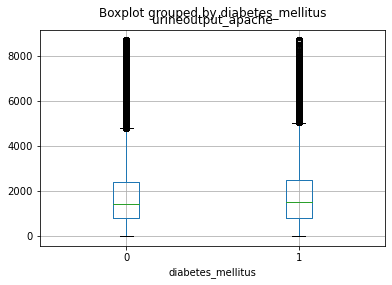

In [42]:
# Look at distribution of urine
train.boxplot('urineoutput_apache',by='diabetes_mellitus')

In [43]:
# Drop urine output
train = train.drop('urineoutput_apache', axis=1)

In [44]:
for i in train.columns:
    if train[i].dtype != 'object':
        #print(train.hist(i))

SyntaxError: unexpected EOF while parsing (<ipython-input-44-91b0e389a254>, line 3)

In [ ]:
len(train.apache_2_diagnosis.unique())

#variables to exclude from analysis
-hospital_admit_source - 25% missing and no vital info
-

variables with large % of missing values
-albumin_apache - 60%